<a href="https://colab.research.google.com/github/p25-c4/kerly_project/blob/main/03_17_sy_5060wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import konlpy
import zipfile
import io
from multiprocessing import Pool
from konlpy.tag import Kkma
from konlpy.tag import Okt
from tqdm import tqdm
from tqdm import trange, notebook
from tqdm.notebook import tqdm

In [ ]:


matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ZIP 파일 경로
zip_file_path = 'kurly.zip'
# ZIP 파일 열기
with zipfile.ZipFile(zip_file_path) as z:
    # ZIP 파일 내에서 'total.csv' 찾기
    with z.open('kurly.csv') as csv_file:
        # CSV 파일을 Pandas DataFrame으로 읽기
        df = pd.read_csv(csv_file)
# 한글을 제외한 문자 공백으로 대체
df['CleanedItemName'] = df['CleanedItemName'].str.replace('[^가-힣]', ' ', regex=True)
df['CleanedItemName'] = df['CleanedItemName'].str.replace('내외|마리|세트|개수|박스', ' ', regex=True)
# 연령대와 성별로 그룹화
grouped = df.groupby(['AgeGroup', 'Gender'])
# 각 그룹별 데이터프레임을 별도로 저장하기 위한 변수 생성
globals().update({f'df_{age}_{gender}': group_df.reset_index(drop=True) for (age, gender), group_df in grouped})



# 50s_남성

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_50s_남성['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
# 글자별 빈도 계산
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 상위 10개 단어 제거
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/34421 [00:00<?, ?it/s]

{'토마토': 1066,
 '국산': 1052,
 '낙지': 1016,
 '키위': 987,
 '직송': 949,
 '고추': 942,
 '가정': 941,
 '오징어': 922,
 '커피': 905,
 '동원': 854,
 '방울토마토': 848,
 '개입': 840,
 '과일': 834,
 '선물': 824,
 '통조림': 820,
 '호박': 801,
 '도라지': 795,
 '세척': 784,
 '배송': 783,
 '미역': 752,
 '파프리카': 750,
 '블루베리': 748,
 '프레': 743,
 '산지': 728,
 '골드': 697,
 '부사': 696,
 '치즈': 691,
 '참치': 655,
 '손질': 648,
 '호박고구마': 633,
 '볶음': 629,
 '완도': 606,
 '애호박': 603,
 '멸치': 590,
 '경북': 583,
 '대추': 573,
 '포기': 564,
 '포장': 560,
 '대파': 556,
 '롯데': 549,
 '상추': 546,
 '카레': 537,
 '제주': 535,
 '냉장': 523,
 '그린': 523,
 '유기농': 522,
 '수박': 518,
 '전복': 513,
 '자연': 512,
 '프리미엄': 501,
 '황도': 492,
 '미니': 478,
 '쪽파': 470,
 '라이스': 459,
 '우리': 453,
 '식탁': 453,
 '스테비': 442,
 '농심': 440,
 '농약': 439,
 '안동': 436,
 '양상추': 432,
 '과내': 432,
 '고당': 430,
 '종가': 428,
 '국수': 423,
 '농협': 412,
 '식품': 410,
 '꽁치': 406,
 '푸드': 400,
 '상품': 395,
 '못난이': 385,
 '특상': 385,
 '당일': 374,
 '이상': 370,
 '원두': 369,
 '청정': 366,
 '나주': 365,
 '황토': 362,
 '새벽': 361,
 '땅콩': 359,
 '풀무원': 358,
 '

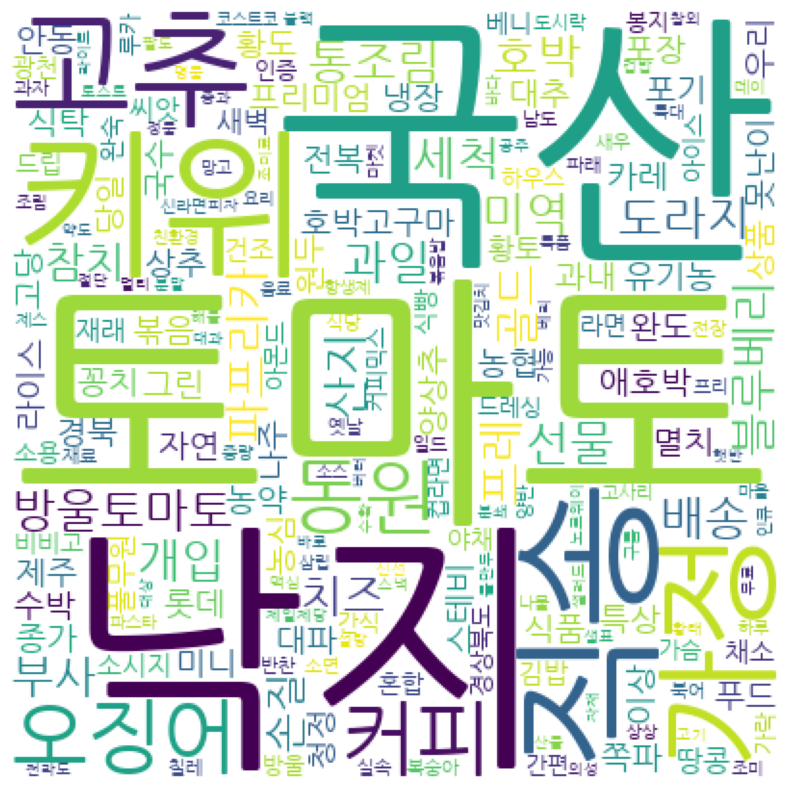

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('50s_남성_wordcloud') # 파일 저장


# 60s_남성

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_60s_남성['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
# 글자별 빈도 계산
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/11319 [00:00<?, ?it/s]

{'고등어': 338,
 '만두': 327,
 '직송': 324,
 '키위': 320,
 '토마토': 317,
 '동원': 315,
 '방울토마토': 297,
 '오징어': 292,
 '과일': 290,
 '미역': 288,
 '커피': 283,
 '가정': 281,
 '통조림': 276,
 '도라지': 267,
 '배송': 267,
 '고추': 266,
 '세척': 262,
 '개입': 260,
 '호박': 259,
 '선물': 256,
 '블루베리': 246,
 '치즈': 245,
 '산지': 238,
 '호박고구마': 225,
 '참치': 224,
 '애호박': 221,
 '손질': 220,
 '부사': 217,
 '파프리카': 211,
 '멸치': 209,
 '완도': 209,
 '볶음': 204,
 '골드': 203,
 '대추': 200,
 '프레': 199,
 '경북': 196,
 '롯데': 192,
 '상추': 188,
 '라이스': 187,
 '대파': 182,
 '포장': 181,
 '그린': 178,
 '수박': 177,
 '유기농': 176,
 '포기': 173,
 '제주': 169,
 '농심': 166,
 '자연': 166,
 '냉장': 160,
 '우리': 158,
 '전복': 157,
 '카레': 154,
 '쪽파': 153,
 '양상추': 152,
 '농협': 149,
 '황도': 149,
 '꽁치': 148,
 '과내': 148,
 '안동': 147,
 '상품': 147,
 '종가': 145,
 '스테비': 144,
 '국수': 142,
 '식탁': 140,
 '미니': 140,
 '프리미엄': 135,
 '특상': 135,
 '새벽': 134,
 '씨앗': 133,
 '농약': 133,
 '푸드': 133,
 '이상': 127,
 '채소': 127,
 '식품': 126,
 '고당': 123,
 '황토': 122,
 '당일': 121,
 '라면': 119,
 '땅콩': 119,
 '식빵': 117,
 '못난이': 117,
 '청정'

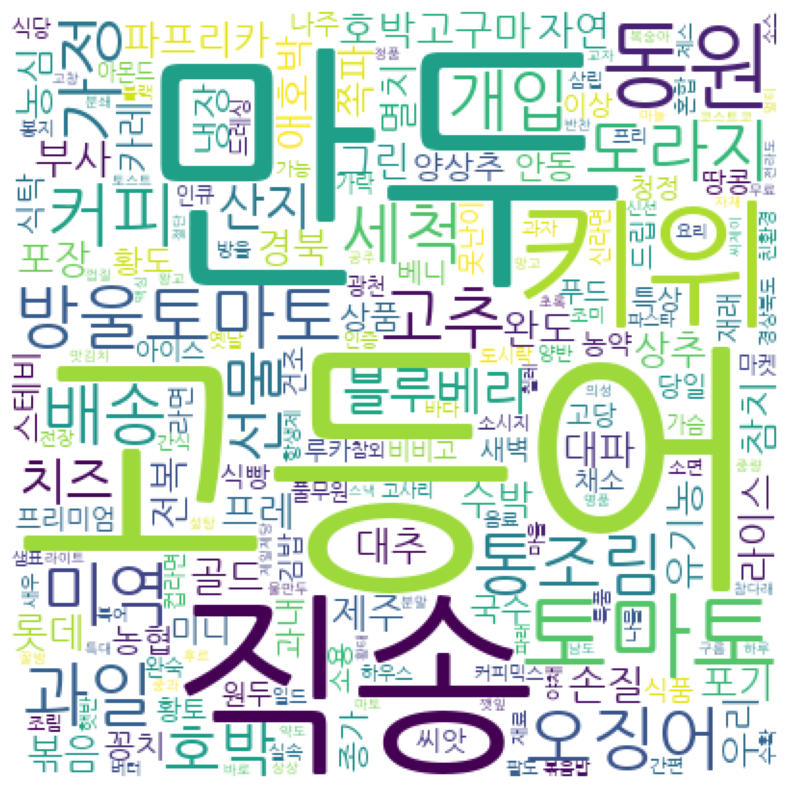

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('60s_남성_wordcloud') # 파일 저장

# 50s_여성

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_50s_여성['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]


# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/65121 [00:00<?, ?it/s]

{'만두': 1986,
 '토마토': 1939,
 '낙지': 1911,
 '직송': 1904,
 '고추': 1784,
 '동원': 1764,
 '키위': 1719,
 '커피': 1719,
 '오징어': 1633,
 '방울토마토': 1623,
 '가정': 1620,
 '통조림': 1598,
 '과일': 1581,
 '개입': 1581,
 '배송': 1568,
 '도라지': 1509,
 '세척': 1501,
 '산지': 1496,
 '호박': 1474,
 '블루베리': 1473,
 '선물': 1451,
 '프레': 1432,
 '미역': 1409,
 '파프리카': 1334,
 '참치': 1325,
 '치즈': 1314,
 '호박고구마': 1263,
 '부사': 1243,
 '골드': 1216,
 '손질': 1202,
 '애호박': 1167,
 '멸치': 1153,
 '볶음': 1150,
 '상추': 1137,
 '대추': 1114,
 '완도': 1104,
 '포기': 1104,
 '경북': 1103,
 '롯데': 1053,
 '포장': 1040,
 '수박': 1039,
 '카레': 1024,
 '자연': 1018,
 '냉장': 1016,
 '라이스': 1010,
 '제주': 990,
 '황도': 978,
 '대파': 976,
 '유기농': 939,
 '그린': 936,
 '종가': 932,
 '미니': 922,
 '전복': 896,
 '프리미엄': 888,
 '우리': 876,
 '스테비': 861,
 '안동': 858,
 '쪽파': 840,
 '농약': 833,
 '농심': 830,
 '농협': 829,
 '식탁': 822,
 '고당': 822,
 '꽁치': 821,
 '상품': 812,
 '과내': 785,
 '푸드': 770,
 '양상추': 769,
 '당일': 765,
 '새벽': 741,
 '땅콩': 717,
 '국수': 716,
 '식품': 715,
 '원두': 712,
 '비비고': 705,
 '이상': 700,
 '청정': 695,
 '김밥': 69

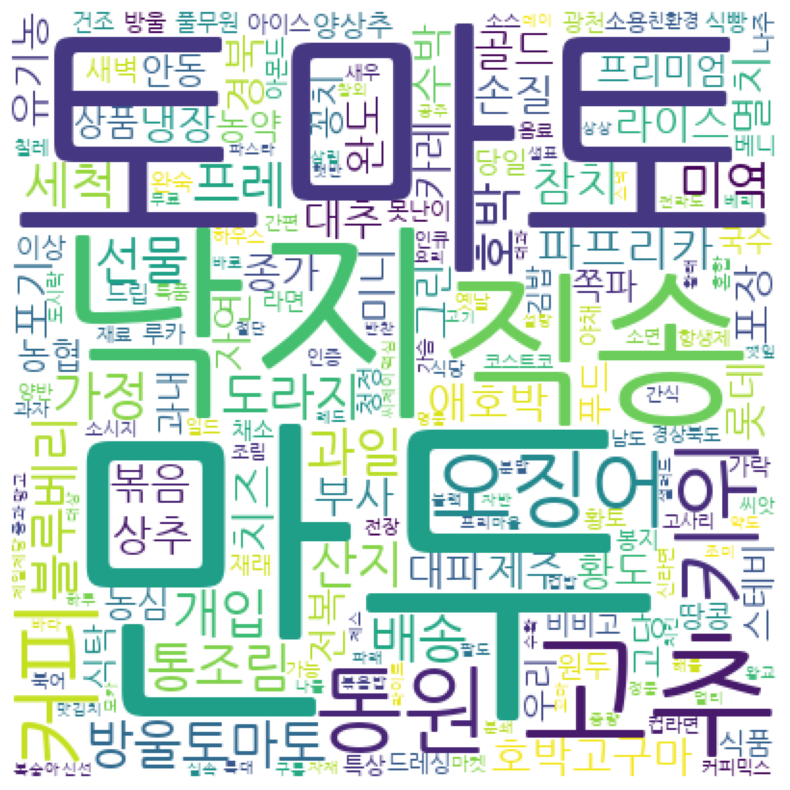

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('50s_여성_wordcloud') # 파일 저장

# 60s_여성

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_60s_여성['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/32748 [00:00<?, ?it/s]

{'낙지': 1009,
 '직송': 971,
 '토마토': 967,
 '만두': 948,
 '고추': 923,
 '키위': 853,
 '가정': 852,
 '커피': 841,
 '동원': 830,
 '방울토마토': 821,
 '오징어': 810,
 '도라지': 802,
 '개입': 783,
 '호박': 781,
 '세척': 781,
 '블루베리': 769,
 '과일': 766,
 '산지': 765,
 '프레': 754,
 '선물': 740,
 '미역': 738,
 '통조림': 735,
 '치즈': 707,
 '배송': 706,
 '파프리카': 686,
 '부사': 634,
 '호박고구마': 626,
 '멸치': 616,
 '골드': 610,
 '볶음': 600,
 '참치': 592,
 '손질': 589,
 '완도': 586,
 '경북': 577,
 '애호박': 576,
 '대추': 553,
 '라이스': 525,
 '포기': 513,
 '수박': 512,
 '상추': 506,
 '대파': 506,
 '롯데': 505,
 '제주': 499,
 '포장': 495,
 '황도': 492,
 '전복': 488,
 '냉장': 486,
 '자연': 478,
 '유기농': 467,
 '카레': 467,
 '미니': 461,
 '식탁': 449,
 '쪽파': 448,
 '종가': 443,
 '그린': 439,
 '우리': 439,
 '농심': 433,
 '프리미엄': 431,
 '농협': 426,
 '양상추': 422,
 '국수': 418,
 '스테비': 414,
 '상품': 403,
 '농약': 402,
 '안동': 400,
 '고당': 395,
 '특상': 395,
 '못난이': 387,
 '나주': 386,
 '땅콩': 384,
 '꽁치': 381,
 '당일': 381,
 '과내': 378,
 '푸드': 364,
 '비비고': 359,
 '소용': 356,
 '황토': 356,
 '원두': 354,
 '식품': 349,
 '광천': 346,
 '이상': 342,
 '베니

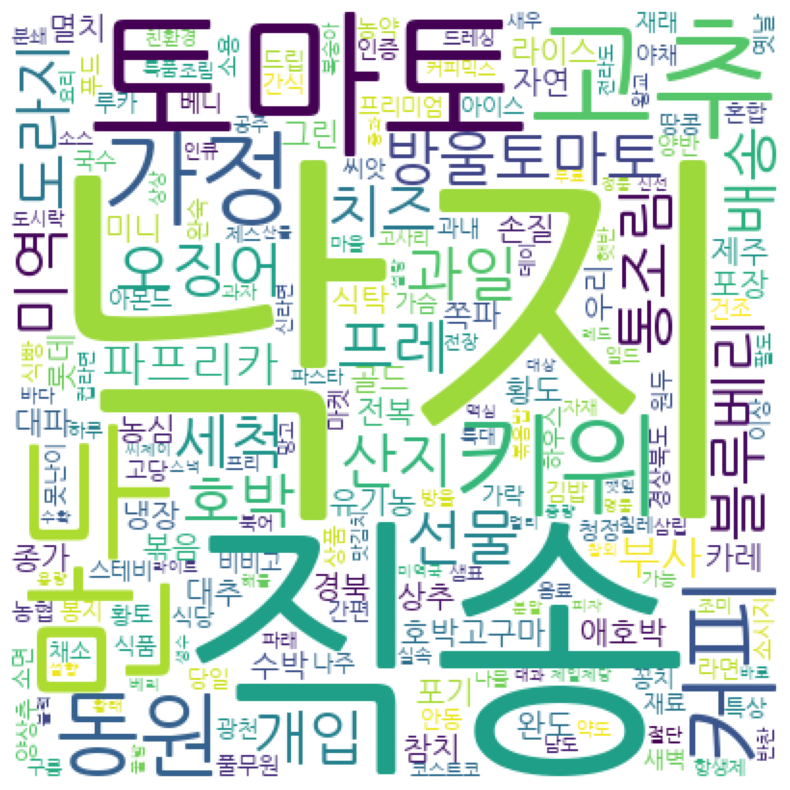

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('60s_여성_wordcloud') # 파일 저장

# Family Count

In [ ]:
# 연령대와 성별로 그룹화
grouped = df.groupby(['AgeGroup', 'Gender', 'FamilyCount'])
# 각 그룹별 데이터프레임을 별도로 저장하기 위한 변수 생성
globals().update({f'df_{age}_{gender}_{FamilyCount}': group_df.reset_index(drop=True) for (age, gender,FamilyCount), group_df in grouped})



# 60s_여성_1

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_60s_여성_1['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/11391 [00:00<?, ?it/s]

{'직송': 355,
 '만두': 345,
 '고추': 328,
 '낙지': 327,
 '토마토': 318,
 '동원': 309,
 '커피': 298,
 '방울토마토': 289,
 '키위': 284,
 '호박': 283,
 '도라지': 279,
 '가정': 277,
 '개입': 276,
 '세척': 273,
 '산지': 273,
 '오징어': 270,
 '치즈': 267,
 '블루베리': 258,
 '과일': 252,
 '배송': 251,
 '선물': 250,
 '프레': 250,
 '미역': 241,
 '파프리카': 240,
 '호박고구마': 230,
 '통조림': 225,
 '참치': 224,
 '부사': 219,
 '골드': 219,
 '볶음': 216,
 '멸치': 214,
 '손질': 199,
 '대추': 197,
 '상추': 197,
 '경북': 191,
 '완도': 190,
 '애호박': 190,
 '라이스': 188,
 '포장': 186,
 '대파': 182,
 '수박': 181,
 '제주': 172,
 '식탁': 172,
 '자연': 172,
 '미니': 171,
 '포기': 168,
 '유기농': 167,
 '롯데': 166,
 '카레': 162,
 '농협': 160,
 '냉장': 158,
 '우리': 158,
 '그린': 156,
 '양상추': 155,
 '프리미엄': 151,
 '땅콩': 150,
 '쪽파': 150,
 '황도': 147,
 '국수': 146,
 '전복': 146,
 '농약': 146,
 '스테비': 141,
 '종가': 140,
 '안동': 140,
 '특상': 138,
 '농심': 138,
 '나주': 138,
 '상품': 133,
 '고당': 131,
 '베니': 131,
 '당일': 130,
 '황토': 130,
 '못난이': 129,
 '비비고': 128,
 '광천': 126,
 '루카': 125,
 '소용': 122,
 '김밥': 121,
 '꽁치': 120,
 '과내': 119,
 '풀무원': 118,
 '원두

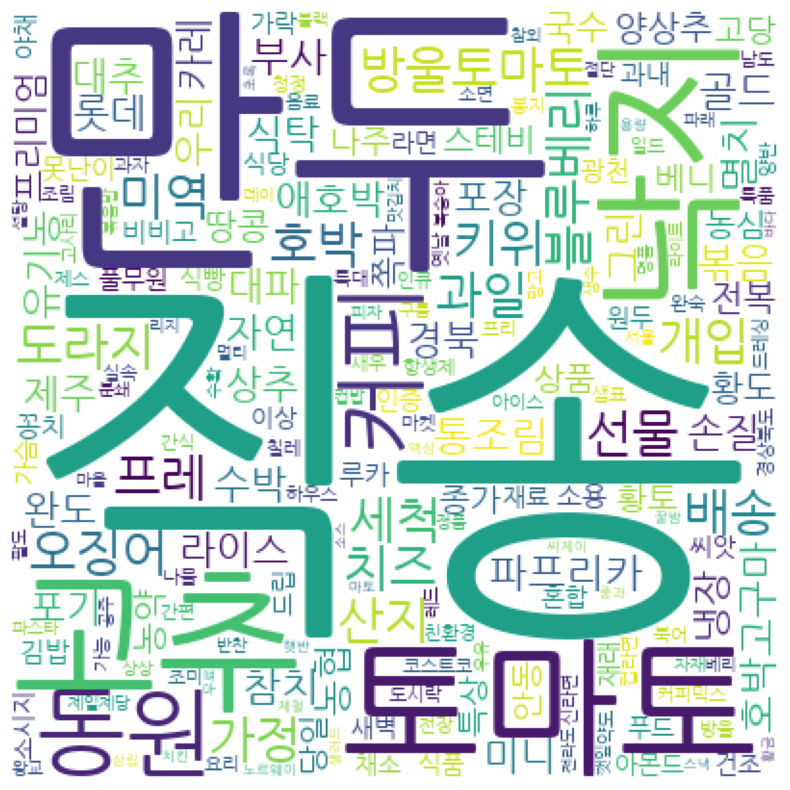

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('60s_여성_1_wordcloud') # 파일 저장

# 60s_여성_2

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_60s_여성_2['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/10975 [00:00<?, ?it/s]

{'만두': 342,
 '해남': 341,
 '토마토': 329,
 '고추': 310,
 '직송': 307,
 '키위': 289,
 '가정': 285,
 '통조림': 281,
 '오징어': 277,
 '개입': 277,
 '커피': 276,
 '호박': 275,
 '세척': 271,
 '도라지': 270,
 '과일': 269,
 '동원': 268,
 '블루베리': 263,
 '프레': 263,
 '산지': 250,
 '방울토마토': 249,
 '선물': 244,
 '미역': 243,
 '배송': 235,
 '치즈': 228,
 '파프리카': 223,
 '완도': 222,
 '애호박': 218,
 '부사': 216,
 '호박고구마': 213,
 '골드': 208,
 '경북': 204,
 '손질': 204,
 '황도': 194,
 '참치': 192,
 '멸치': 190,
 '전복': 183,
 '수박': 178,
 '자연': 175,
 '볶음': 170,
 '라이스': 169,
 '냉장': 168,
 '농심': 168,
 '대추': 167,
 '대파': 167,
 '제주': 166,
 '롯데': 166,
 '포기': 164,
 '유기농': 163,
 '포장': 162,
 '종가': 161,
 '미니': 154,
 '카레': 146,
 '상추': 144,
 '쪽파': 143,
 '상품': 143,
 '과내': 141,
 '국수': 140,
 '농약': 138,
 '그린': 138,
 '못난이': 136,
 '안동': 136,
 '프리미엄': 135,
 '우리': 133,
 '고당': 132,
 '농협': 130,
 '꽁치': 129,
 '특상': 129,
 '스테비': 129,
 '양상추': 129,
 '식탁': 129,
 '식품': 128,
 '비비고': 126,
 '나주': 125,
 '풀무원': 121,
 '황토': 120,
 '광천': 119,
 '원두': 118,
 '이상': 118,
 '소용': 118,
 '건조': 117,
 '푸드': 117,
 '당일

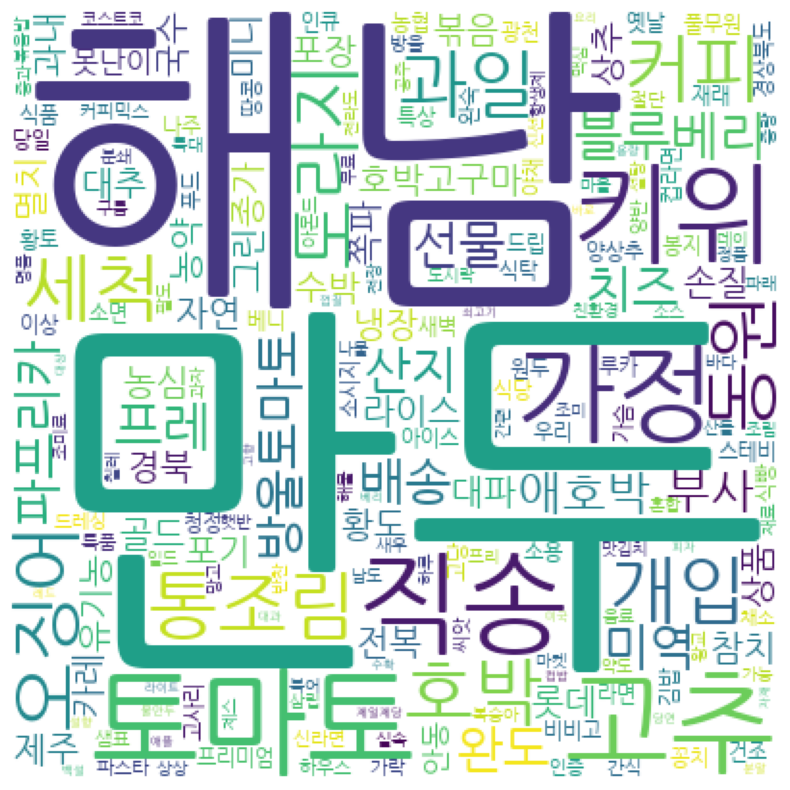

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('60s_여성_2_wordcloud') # 파일 저장

# 60s_여성_0

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_60s_여성_0['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/10382 [00:00<?, ?it/s]

{'낙지': 320,
 '직송': 309,
 '국산': 301,
 '가정': 290,
 '고추': 285,
 '방울토마토': 283,
 '키위': 280,
 '커피': 267,
 '오징어': 263,
 '만두': 261,
 '미역': 254,
 '도라지': 253,
 '동원': 253,
 '블루베리': 248,
 '선물': 246,
 '과일': 245,
 '산지': 242,
 '프레': 241,
 '세척': 237,
 '개입': 230,
 '통조림': 229,
 '파프리카': 223,
 '호박': 223,
 '배송': 220,
 '볶음': 214,
 '멸치': 212,
 '치즈': 212,
 '부사': 199,
 '대추': 189,
 '손질': 186,
 '골드': 183,
 '호박고구마': 183,
 '경북': 182,
 '포기': 181,
 '참치': 176,
 '완도': 174,
 '롯데': 173,
 '라이스': 168,
 '애호박': 168,
 '상추': 165,
 '제주': 161,
 '냉장': 160,
 '카레': 159,
 '전복': 159,
 '대파': 157,
 '쪽파': 155,
 '수박': 153,
 '황도': 151,
 '식탁': 148,
 '우리': 148,
 '포장': 147,
 '그린': 145,
 '프리미엄': 145,
 '스테비': 144,
 '종가': 142,
 '양상추': 138,
 '유기농': 137,
 '농협': 136,
 '미니': 136,
 '당일': 135,
 '땅콩': 134,
 '푸드': 133,
 '꽁치': 132,
 '국수': 132,
 '고당': 132,
 '자연': 131,
 '특상': 128,
 '상품': 127,
 '농심': 127,
 '안동': 124,
 '나주': 123,
 '못난이': 122,
 '원두': 119,
 '농약': 118,
 '과내': 118,
 '라면': 117,
 '소용': 116,
 '이상': 113,
 '새벽': 112,
 '식당': 112,
 '청정': 110,
 '식품': 

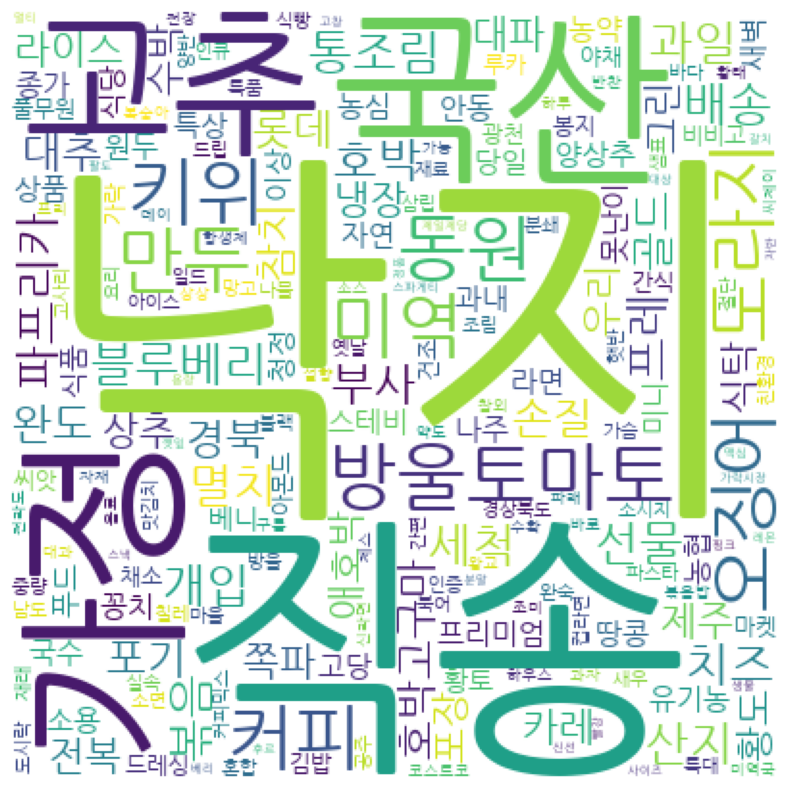

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('60s_여성_0_wordcloud') # 파일 저장

# 50s_여성_0

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_50s_여성_0['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/3225 [00:00<?, ?it/s]

{'해남': 102,
 '오징어': 95,
 '만두': 94,
 '낙지': 87,
 '직송': 85,
 '프레': 83,
 '배송': 82,
 '토마토': 81,
 '호박': 79,
 '키위': 77,
 '커피': 76,
 '도라지': 76,
 '가정': 74,
 '블루베리': 70,
 '손질': 70,
 '애호박': 70,
 '방울토마토': 70,
 '산지': 69,
 '미역': 68,
 '볶음': 68,
 '파프리카': 68,
 '선물': 67,
 '참치': 66,
 '동원': 64,
 '개입': 63,
 '호박고구마': 63,
 '세척': 63,
 '제주': 63,
 '경북': 62,
 '부사': 62,
 '골드': 61,
 '완도': 60,
 '치즈': 59,
 '과일': 58,
 '냉장': 58,
 '통조림': 56,
 '자연': 54,
 '상추': 52,
 '멸치': 52,
 '롯데': 52,
 '라이스': 52,
 '포기': 52,
 '종가': 52,
 '땅콩': 51,
 '식품': 50,
 '전복': 49,
 '대추': 48,
 '우리': 47,
 '유기농': 47,
 '풀무원': 47,
 '농심': 46,
 '농약': 45,
 '식탁': 45,
 '미니': 44,
 '수박': 44,
 '대파': 43,
 '소용': 43,
 '쪽파': 42,
 '카레': 42,
 '과내': 42,
 '이상': 41,
 '당일': 41,
 '안동': 40,
 '포장': 40,
 '황도': 39,
 '프리미엄': 39,
 '상품': 38,
 '식빵': 37,
 '황토': 36,
 '간식': 36,
 '국수': 36,
 '그린': 34,
 '베니': 34,
 '못난이': 33,
 '고사리': 33,
 '푸드': 33,
 '루카': 33,
 '광천': 33,
 '항생제': 33,
 '꽁치': 33,
 '비비고': 33,
 '드레싱': 32,
 '특상': 32,
 '고당': 32,
 '새벽': 32,
 '스테비': 31,
 '채소': 31,
 '농협': 31,
 '드립'

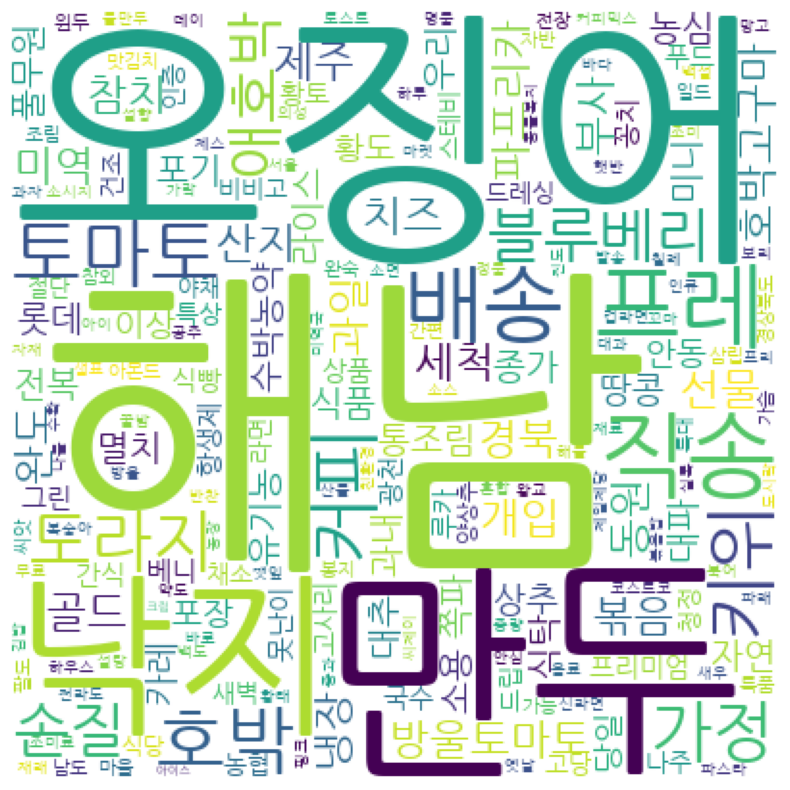

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('50s_여성_0_wordcloud') # 파일 저장

# 50s_여성_1

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_50s_여성_1['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/23248 [00:00<?, ?it/s]

{'국산': 727,
 '낙지': 710,
 '직송': 706,
 '토마토': 672,
 '키위': 661,
 '동원': 646,
 '고추': 621,
 '커피': 616,
 '통조림': 605,
 '오징어': 593,
 '가정': 584,
 '개입': 578,
 '배송': 573,
 '방울토마토': 565,
 '과일': 547,
 '세척': 543,
 '블루베리': 541,
 '산지': 536,
 '도라지': 533,
 '호박': 519,
 '선물': 514,
 '프레': 511,
 '치즈': 505,
 '미역': 484,
 '파프리카': 480,
 '호박고구마': 472,
 '참치': 468,
 '부사': 446,
 '골드': 437,
 '손질': 425,
 '상추': 407,
 '롯데': 404,
 '포장': 403,
 '멸치': 402,
 '볶음': 398,
 '애호박': 397,
 '경북': 393,
 '대파': 388,
 '라이스': 386,
 '수박': 384,
 '대추': 381,
 '포기': 374,
 '완도': 374,
 '그린': 371,
 '자연': 362,
 '제주': 360,
 '카레': 359,
 '황도': 358,
 '냉장': 349,
 '유기농': 329,
 '종가': 325,
 '프리미엄': 322,
 '안동': 321,
 '미니': 316,
 '고당': 310,
 '우리': 308,
 '농협': 308,
 '전복': 306,
 '농심': 304,
 '식탁': 304,
 '양상추': 300,
 '스테비': 300,
 '쪽파': 298,
 '푸드': 295,
 '농약': 295,
 '꽁치': 294,
 '상품': 289,
 '새벽': 269,
 '과내': 267,
 '청정': 265,
 '이상': 263,
 '못난이': 263,
 '당일': 258,
 '원두': 254,
 '나주': 254,
 '특상': 251,
 '김밥': 250,
 '황토': 249,
 '비비고': 247,
 '라면': 241,
 '광천': 239,
 '국수'

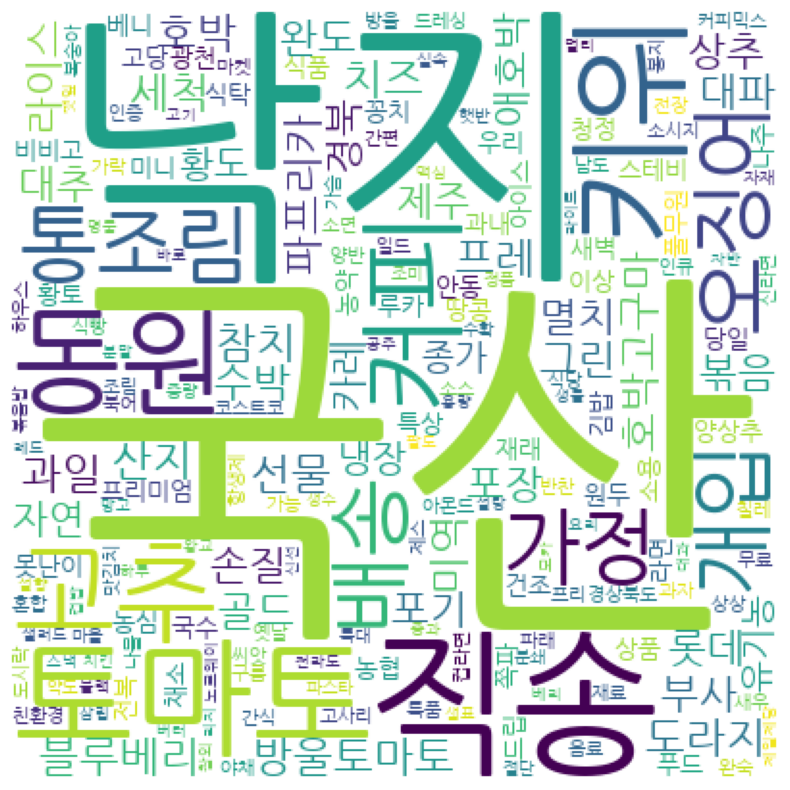

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('50s_여성_1_wordcloud') # 파일 저장

# 50s_여성_2

In [ ]:
# tqdm.pandas()를 사용하여 pandas의 apply 함수에 진행 상황 바 적용
tqdm.pandas()
okt = Okt()
# 이름 바꿔
# 명사 추출 및 특정 단어 제거
nouns = df_50s_여성_2['CleanedItemName'].progress_apply(okt.nouns)
# 각 명사를 별도의 행으로 전개
nouns = nouns.explode()
# 글자수 2개 이하 제거(불필요하게 짧은 단어를 분석에서 제외하기 위함)
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
# 글자별 빈도 계산
df_word=df_word[10:]
# 최종적으로 생성된 단어와 빈도수 데이터프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

  0%|          | 0/28692 [00:00<?, ?it/s]

{'토마토': 887,
 '만두': 878,
 '낙지': 847,
 '직송': 840,
 '고추': 826,
 '동원': 777,
 '커피': 764,
 '방울토마토': 743,
 '과일': 733,
 '키위': 728,
 '통조림': 707,
 '오징어': 703,
 '가정': 702,
 '개입': 700,
 '배송': 691,
 '세척': 689,
 '산지': 678,
 '도라지': 676,
 '미역': 648,
 '호박': 644,
 '선물': 636,
 '블루베리': 606,
 '프레': 605,
 '참치': 554,
 '파프리카': 553,
 '치즈': 553,
 '부사': 551,
 '호박고구마': 543,
 '골드': 543,
 '멸치': 521,
 '포기': 518,
 '애호박': 513,
 '손질': 513,
 '대추': 509,
 '상추': 508,
 '완도': 506,
 '볶음': 505,
 '경북': 489,
 '수박': 448,
 '자연': 444,
 '카레': 442,
 '냉장': 440,
 '롯데': 432,
 '포장': 430,
 '종가': 424,
 '유기농': 422,
 '황도': 417,
 '라이스': 415,
 '대파': 411,
 '미니': 411,
 '제주': 410,
 '전복': 408,
 '그린': 394,
 '스테비': 390,
 '우리': 383,
 '프리미엄': 378,
 '꽁치': 377,
 '과내': 373,
 '농약': 373,
 '농협': 365,
 '상품': 365,
 '쪽파': 359,
 '고당': 357,
 '안동': 347,
 '농심': 342,
 '푸드': 342,
 '식탁': 342,
 '새벽': 338,
 '당일': 331,
 '식품': 329,
 '국수': 324,
 '양상추': 319,
 '원두': 314,
 '김밥': 313,
 '땅콩': 311,
 '특상': 305,
 '비비고': 303,
 '못난이': 302,
 '풀무원': 297,
 '베니': 296,
 '청정': 293,
 '광천

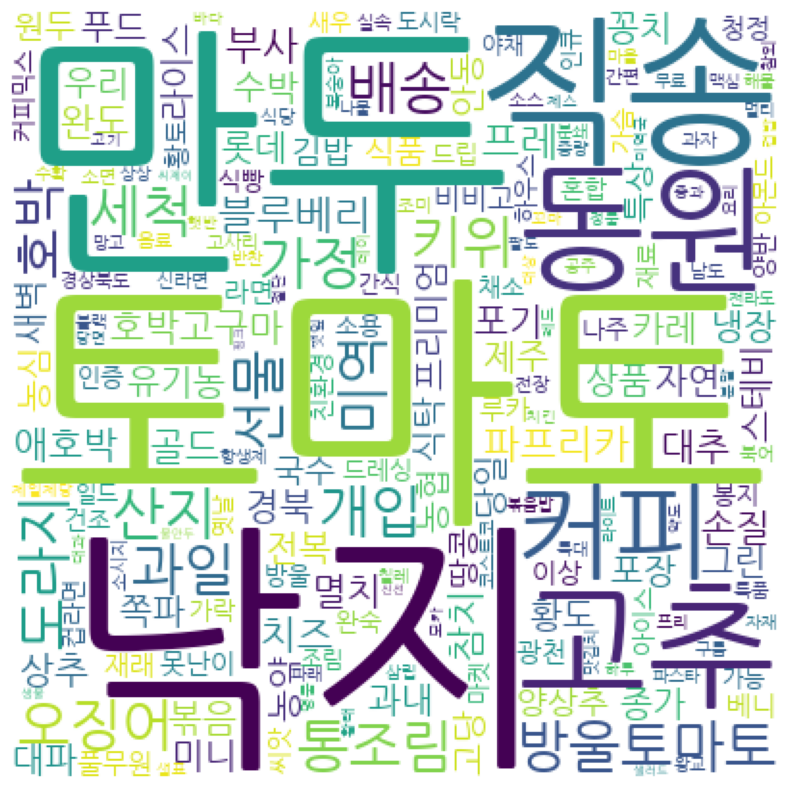

In [ ]:
# 워드클라우드 만들기
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# 이름 바꿔
plt.savefig('50s_여성_2_wordcloud') # 파일 저장